<img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/>

<h1>Hackwagon Academy DS102 - Problem Set 3</h1>
<hr>

This Problem Set consists of 20 questions, with each correct answer to be awarded 1 mark, totalling up to 20 marks.

If you have any questions to the Problem Set, feel free to send a message to your TAs or Instructors in the Telegram chat. You are encouraged to also discuss the problem sets within your own groups.

Attempt but minor syntax errors are awarded half the mark.

In [47]:
#Before you start, please perform the following 2 steps:
#1. Rename the file to FirstName_LastName Hackwagon Academy DS102 - Problem Set 3 e.g. John_Doe Hackwagon Academy DS102 - Problem Set 1

#2. Fill in your details here:
#Name                    : ___________Lim Yu Guang____________

#Start of Course Class(Edit accordingly): __24 May 2020___

# FOR TA/INSTRUCTOR 
# Total Marks:  / 20

In [48]:
import warnings
warnings.filterwarnings('ignore')

#### Credits 

This problem set is inspired by the [Lending Club Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data). 

<img src="https://d1ic4altzx8ueg.cloudfront.net/niche-builder/5cb94cef96518.png" width=300>

## Context 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. 

Your first project is to help LendingClub prepare a prediction model to help them detect loan defaulters. Having already conducted the sufficient exploratory data analysis, your project manager, Silver, wants you to to prepare several machine learning models. Using the dataset which you have preprocessed, `loans_transformed-200k.csv`, you will have to create both <b>supervised and unsupervised machine learning models</b>. Additionally, the `all_loan_desc.csv` dataset prepared for you to prepare a model on the loans descriptions. 

There are a total of 4 parts to this problem set:

1. Naive Bayes Classifier - 8 marks
2. K-Means Clustering - 7 marks
3. Decision Tree Classifier - 3 marks
4. Performance Measures - 2 marks

## Naive Bayes Classifier - 8 marks

Another team has prepared for you all of the descriptions within the loans dataset. This dataset has filtered for you rows with descriptions and the target variable the loan status. Your task is to clean it further and use <b>Naive Bayes Classification</b> technique to develop a model for detecting loan defaulters.

### Open Loans Decription File 

Open the file `all_loan_desc.csv` and store it as `all_desc_df`.

In [49]:
import pandas as pd
all_desc_df = pd.read_csv("all_loan_desc.csv")
all_desc_df.head()

,desc,loan_status
0,,Charged Off
1,,Fully Paid
2,I currently have a loan out with CashCall. The...,Fully Paid
3,Consolidate debt,Current
4,This loan will be used solely to consolidate c...,Fully Paid


### Q1. Integer Encoding

With the target variable `loan_status`, create a new column called `target`, where if the value contains the word `Charged Off`, `Status:Charged Off` or `Default`, it will be `1`; else it will be `0`. Afterwhich, reduce the dataframe to just the `desc` and `target` columns. 

**Expected Output:**

<img src="https://i.imgur.com/ztyxJh0.png">

In [50]:
def target_generator(x):
    if 'Charged Off' in x:
        return 1
    elif 'Status:Charged Off' in x:
        return 1
    elif 'Default' in x:
        return 1
    else:
        return 0

all_desc_df['target'] = all_desc_df['loan_status'].apply(target_generator)

all_desc_df = all_desc_df[['desc','target']]

all_desc_df.head()

,desc,target
0,,1
1,,0
2,I currently have a loan out with CashCall. The...,0
3,Consolidate debt,0
4,This loan will be used solely to consolidate c...,0


In [51]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q2. Simple Cleaning

To ensure that your model is efficient, conduct simple cleaning on each description where the descriptions:

1. Only contains alphanumeric characters (<i>hint: use regular expression</i>)
2. Entirely lowercase
3. Without trailing or leading spaces 
4. Not empty strings (<i>hint: use filter</i>)

**Expected Output:**

<img src="https://i.imgur.com/pbLsgSa.png">

In [52]:
import re
def clean(desc):
    pattern = re.compile('([^\s\w]|_)+')
    desc = re.sub(pattern, "", desc)
    desc = desc.strip()
    desc = desc.lower()

    return desc

all_desc_df['desc'] = all_desc_df['desc'].apply(clean)

all_desc_df = all_desc_df[all_desc_df['desc'] != '']

all_desc_df.head()

,desc,target
2,i currently have a loan out with cashcall the ...,0
3,consolidate debt,0
4,this loan will be used solely to consolidate c...,0
5,i have recently purchased and built a new home...,0
6,temporary cash flow challenges would like this...,0


In [53]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q3. Tokenize and Stem Words

For simplicity and lower processing time, you decided to use `PorterStemmer` to stem each word. As such, you would need to reduce each description to their root form. 

Steps: 

1. With the `nltk` library, use `word_tokenize` to tokenize each description (a list of words)
2. Use the `PorterStemmer` to stem each word (using a for-loop). 
3. Join up the stemmed words as a string.

All steps above must be done <b>within the same function.</b> Your function should return a string.

Using the `apply()` method, create a new column called `desc_stem` to the `all_desc_df`. 

<b>Note: This part might take awhile to run (an average of 3 minutes).</b>

**Expected Output:**

<img src="https://i.imgur.com/XXDqd3i.png">

In [54]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def desc_stemmer(desc):
    tokenized = word_tokenize(desc)
    stemmed = []
    desc_stemmed = ''
    for token in tokenized:
        stemmed.append(stemmer.stem(token))
        
    for word in stemmed:
        desc_stemmed = desc_stemmed + word + ' '
    return desc_stemmed

all_desc_df['desc_stem'] = all_desc_df['desc'].apply(desc_stemmer)
all_desc_df.head()

,desc,target,desc_stem
2,i currently have a loan out with cashcall the ...,0,i current have a loan out with cashcal the int...
3,consolidate debt,0,consolid debt
4,this loan will be used solely to consolidate c...,0,thi loan will be use sole to consolid credit c...
5,i have recently purchased and built a new home...,0,i have recent purchas and built a new home tha...
6,temporary cash flow challenges would like this...,0,temporari cash flow challeng would like thi lo...


In [55]:
## TA/INSTRUCTOR ONLY
## MARK AWARDED: /1

### Q4. Stop Words Removal

To keep only relevant words, you will remove all stopwords from each description by using the `stopwords` corpus to remove them. 

Steps: 

1. Create the list of stopwords in `english`
2. Tokenize the each description
3. Check for stopwords 
4. Join up non stopwords as a string

All steps, except step 1, must be done <b>within the same function.</b> Your function should return a string.

Using the `apply()` method, create a new column called `desc_no_stopwords` to the `all_desc_df`. 

<b>Note: This part might take awhile to run (an average of 2 minutes).</b>

**Expected Output:**

<img src="https://i.imgur.com/1fED4Uu.png">

In [56]:
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')

def desc_cleaner(desc):
    tokenized = word_tokenize(desc)
    cleaned = []
    desc_no_stopwords = ''
    
    for token in tokenized:
        if token not in STOPWORDS:
            cleaned.append(token)
    for word in cleaned:
        desc_no_stopwords = desc_no_stopwords + word + ' '
    
    return desc_no_stopwords

all_desc_df['desc_cleaned'] = all_desc_df['desc_stem'].apply(desc_cleaner)

all_desc_df.head()

,desc,target,desc_stem,desc_cleaned
2,i currently have a loan out with cashcall the ...,0,i current have a loan out with cashcal the int...,current loan cashcal interest rate 96 time too...
3,consolidate debt,0,consolid debt,consolid debt
4,this loan will be used solely to consolidate c...,0,thi loan will be use sole to consolid credit c...,thi loan use sole consolid credit card debt ac...
5,i have recently purchased and built a new home...,0,i have recent purchas and built a new home tha...,recent purchas built new home alway dream woul...
6,temporary cash flow challenges would like this...,0,temporari cash flow challeng would like thi lo...,temporari cash flow challeng would like thi lo...


In [57]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q5. Train Test Split

Split your data up into training and testing sets using `sklearn.model_selection` with `train_test_split`, into 4 different variables, `x_train`, `x_test`, `y_train` and `y_test`, where: 

- <b>first</b> argument should be the `desc_cleaned` column but as a <b>DataFrame (2 square brackets)</b>
- <b>second</b> argument should <b>only</b> be the `target` column
- `random_state` is 0
- `test_size` is 0.2

In [58]:
from sklearn.model_selection import train_test_split

x = all_desc_df[['desc_cleaned']]
y = all_desc_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)


In [59]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q6. Vectorizer

As you would be using the Naive Bayes Classifier, you would need to transform your description into a matrix of 1s and 0s. Use the `CountVectorizer` to transform your `desc_cleaned` into a matrix, called `desc_matrix`.

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
desc_matrix = vectorizer.fit_transform(x_train['desc_cleaned'])

desc_matrix

<100650x55058 sparse matrix of type '<class 'numpy.int64'>'
	with 2039365 stored elements in Compressed Sparse Row format>

In [61]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q7. Multinomial Naive Bayes Classifier 

Create a new `MultinomialNB` classifer and name it as `desc_classifier`, then `.fit()` the vectorized matrix, `desc_matrix` and `y_train`.

In [62]:
from sklearn.naive_bayes import MultinomialNB

desc_classifier = MultinomialNB()
desc_fit = desc_classifier.fit(desc_matrix, y_train)
desc_fit

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q8. Confusion Matrix

Plot the confusion matrix for the Naive Bayes Classifier by:

1. Vectorizing (transform) the `x_test` of `desc_cleaned` 
2. Using `.predict` on the vectorized set from the to get the test results
3. Use `sns.heatmap` to create confusion matrix
4. Set `.ylim()` to (2,0)
5. Set `.xlim()` to (0,2)

**Expected Output:**

<img src="https://i.imgur.com/InjikTM.png">

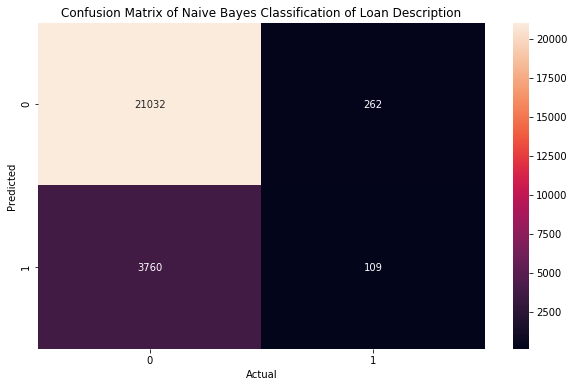

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

test = vectorizer.transform(x_test['desc_cleaned'])
test_nb = desc_fit.predict(test)

nb_cm = confusion_matrix(y_test, test_nb)
fig = plt.figure(figsize=(10,6))

ax = sns.heatmap(nb_cm,annot=True,fmt='.0f')
ax.set(title = 'Confusion Matrix of Naive Bayes Classification of Loan Description', xlabel = 'Actual', ylabel = 'Predicted', xlim = (0,2), ylim = (2,0))
plt.show()

In [65]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

## K-Means Clustering - 7 marks

To discover more insights about the dataset, you decided to ran the K-means clustering algorithm to discover the different clusters that could form. 

### Open Loans Data (Non-Description) File

Open the `loans_transformed-200k.csv` as `all_loans_df`. 

In [66]:
all_loans_df = pd.read_csv('loans_transformed-200k.csv')
all_loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,loan_status,term_int,grade_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round,target
0,14400,36 months,14.47,495.46,C,10+ years,MORTGAGE,109000.0,Source Verified,debt_consolidation,...,Current,0,2,10,0,1,1,8175.0,14,Non Default
1,8000,36 months,10.75,260.97,B,3 years,MORTGAGE,50000.0,Source Verified,credit_card,...,Current,0,1,3,0,1,3,0.0,11,Non Default
2,9500,36 months,18.45,345.60,D,3 years,MORTGAGE,138000.0,Source Verified,credit_card,...,Current,0,3,3,0,1,3,10350.0,18,Non Default
3,16000,60 months,18.99,414.97,D,< 1 year,OWN,66000.0,Not Verified,debt_consolidation,...,Current,1,3,0,1,2,1,4950.0,19,Non Default
4,6800,36 months,13.99,232.38,C,10+ years,MORTGAGE,63000.0,Not Verified,debt_consolidation,...,Current,0,2,10,0,2,1,0.0,14,Non Default


### Q9. Integer Encoding

Just as the above Integer Encoding question, create a new column called `target_int` where `Non Default` is `0` and `Default` is `1`. 

**Expected Output:**

<img src="https://i.imgur.com/D0VcNAs.png"/>

In [67]:
def target_int_creator(x):
    if(x == 'Non Default'):
        return 0
    else:
        return 1
    
all_loans_df['target_int'] = all_loans_df['target'].apply(target_int_creator)
all_loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,term_int,grade_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round,target,target_int
0,14400,36 months,14.47,495.46,C,10+ years,MORTGAGE,109000.0,Source Verified,debt_consolidation,...,0,2,10,0,1,1,8175.0,14,Non Default,0
1,8000,36 months,10.75,260.97,B,3 years,MORTGAGE,50000.0,Source Verified,credit_card,...,0,1,3,0,1,3,0.0,11,Non Default,0
2,9500,36 months,18.45,345.60,D,3 years,MORTGAGE,138000.0,Source Verified,credit_card,...,0,3,3,0,1,3,10350.0,18,Non Default,0
3,16000,60 months,18.99,414.97,D,< 1 year,OWN,66000.0,Not Verified,debt_consolidation,...,1,3,0,1,2,1,4950.0,19,Non Default,0
4,6800,36 months,13.99,232.38,C,10+ years,MORTGAGE,63000.0,Not Verified,debt_consolidation,...,0,2,10,0,2,1,0.0,14,Non Default,0


In [68]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q10. Reduce to Numerical Data

For K-means algorithm to work properly, your dataframe should only contain numeric datasets. Also, you decide to <b>exclude</b> (drop) the `int_round` and `income_tax` columns are similar to the other columns too. Store this dataframe as `loans_numeric_df`. 

**Expected Output:**

<img src="https://i.imgur.com/80Ccldn.png">

In [69]:
loans_numeric_df = all_loans_df.select_dtypes(['number'])
loans_numeric_df.drop(columns = ['int_round', 'income_tax'], inplace = True)

loans_numeric_df.head()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,term_int,grade_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,target_int
0,14400,14.47,495.46,109000.0,8.52,1.0,0,2,10,0,1,1,0
1,8000,10.75,260.97,50000.0,17.31,0.0,0,1,3,0,1,3,0
2,9500,18.45,345.60,138000.0,23.91,0.0,0,3,3,0,1,3,0
3,16000,18.99,414.97,66000.0,33.65,0.0,1,3,0,1,2,1,0
4,6800,13.99,232.38,63000.0,19.68,0.0,0,2,10,0,2,1,0


In [70]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q11. Select Optimal K - Elbow Plot

Plot the elbow plot by doing multiple iterations of the k-means algorithm, between a value of <b>2 to 15 (inclusive)</b>. Select a K that you think is appropriate to carry on in the next step. 

<b>Note: This will take about 2 minutes to compute finish all the Ks</b>

**Expected Output:**

<img src="https://i.imgur.com/VQfZN86.png">

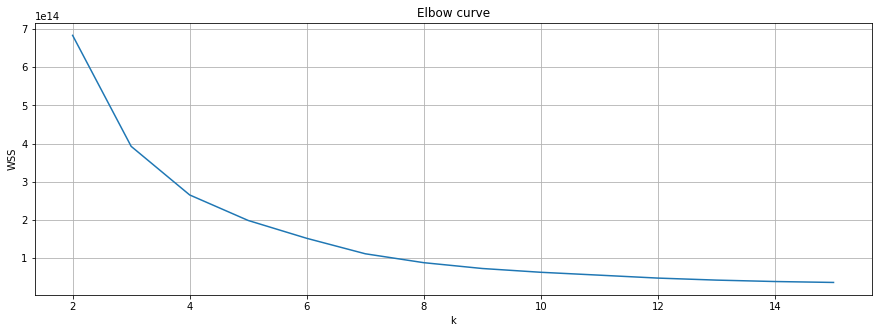

In [71]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = loans_numeric_df
distortions = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 16), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.show()

In [72]:
## TA/INSTRUCTOR ONLY
## PLOT MARK: /1

### Q12. K-Means Clustering with Optimal K - 2 Marks

Choose an <b>appropriate K</b> based on the chart above, then apply the k-means algorithm only once and store the model as `loans_kmeans`.

Make sure `random_state` is 0.

In [73]:
k = 8
model = KMeans(n_clusters=k,  
               random_state=0)

loans_kmeans = model.fit(loans_numeric_df)
print(loans_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


In [74]:
## TA/INSTRUCTOR ONLY
## KMEANS MARK: /1
## SELECTING AN APPROPRIATE K - MARK: /1

### Q13. Set Labels

All loans are now tagged with a particular cluster or label. Using the `.labels_` attribute, create a new column called `label` to `all_loans_df`. 

**Expected Output:** (for k = 8) 

<img src="https://i.imgur.com/uKpialC.png">

In [75]:
all_loans_df['label'] = loans_kmeans.labels_
all_loans_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,grade_int,emp_length_int,home_ownership_int,verification_status_int,purpose_int,income_tax,int_round,target,target_int,label
0,14400,36 months,14.47,495.46,C,10+ years,MORTGAGE,109000.0,Source Verified,debt_consolidation,...,2,10,0,1,1,8175.0,14,Non Default,0,6
1,8000,36 months,10.75,260.97,B,3 years,MORTGAGE,50000.0,Source Verified,credit_card,...,1,3,0,1,3,0.0,11,Non Default,0,3
2,9500,36 months,18.45,345.60,D,3 years,MORTGAGE,138000.0,Source Verified,credit_card,...,3,3,0,1,3,10350.0,18,Non Default,0,6
3,16000,60 months,18.99,414.97,D,< 1 year,OWN,66000.0,Not Verified,debt_consolidation,...,3,0,1,2,1,4950.0,19,Non Default,0,0
4,6800,36 months,13.99,232.38,C,10+ years,MORTGAGE,63000.0,Not Verified,debt_consolidation,...,2,10,0,2,1,0.0,14,Non Default,0,0


In [76]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q14. Clustering Analysis

Now that you've labelled each loans, you want know the <b>proportion of default loans</b> within each cluster

**Expected Output:** (for k = 8) 

    label  target     
    0      Default        0.133062
           Non Default    0.866938
    1      Non Default    1.000000
    2      Default        0.090717
           Non Default    0.909283
    3      Default        0.055154
           Non Default    0.944846
    4      Default        0.090909
           Non Default    0.909091
    5      Default        0.078544
           Non Default    0.921456
    6      Default        0.062500
           Non Default    0.937500
    7      Default        0.113032
           Non Default    0.886968
    dtype: float64

In [77]:
total_size = all_loans_df.groupby('label').size()
label_target_size = all_loans_df.groupby(['label', 'target']).size()
proportion = label_target_size / total_size

proportion

label  target     
0      Default        0.112895
       Non Default    0.887105
1      Default        0.090909
       Non Default    0.909091
2      Default        0.078322
       Non Default    0.921678
3      Default        0.133102
       Non Default    0.866898
4      Default        0.062500
       Non Default    0.937500
5      Non Default    1.000000
6      Default        0.090710
       Non Default    0.909290
7      Default        0.055154
       Non Default    0.944846
dtype: float64

In [78]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

## Decision Tree Classifier - 3 marks

### Q15. Train Test Split

Similar to how you did `train_test_split` on the Decision Tree Classifier, conduct `train_test_split` on the `loans_numeric_df`, into 4 different variables, `x_train`, `x_test`, `y_train` and `y_test`, where: 

- <b>first</b> argument should be all columns but <b>without</b> the `target_int` column as a <b>DataFrame</b>
- <b>second</b> argument should <b>only</b> be the `target_int` column
- `random_state` is 0
- `test_size` is 0.2

In [79]:
df_x = loans_numeric_df.drop(['target_int'], axis=1)
df_y = loans_numeric_df['target_int']
x_train, x_test, y_train, y_test = train_test_split(df_x, 
                                                    df_y, 
                                                    test_size=0.2,
                                                    random_state=0)

In [80]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q16. Fit DecisionTree

Using the `DecisionTreeClassifier`, create a new Decision Tree by using `.fit()` with the `x_train` and `y_train` variables. Name this classifier as `loans_clf`. 

<b>Note: `random_state` should be `0`.</b>

In [81]:
from sklearn import tree
loans_tree = tree.DecisionTreeClassifier(random_state=0)
loans_clf = loans_tree.fit(x_train, y_train)

#print(loans_clf.tree_.max_depth)

In [82]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q17. Confusion Matrix

Plot the confusion matrix for the decision tree classifier by:

1. Using `.predict` on the `x_test` to get the test results
2. Use `sns.heatmap` to create confusion matrix
3. Set `.ylim()` to (2,0)
4. Set `.xlim()` to (0,2)

**Expected Output:**

<img src="https://i.imgur.com/JCRqzHp.png">

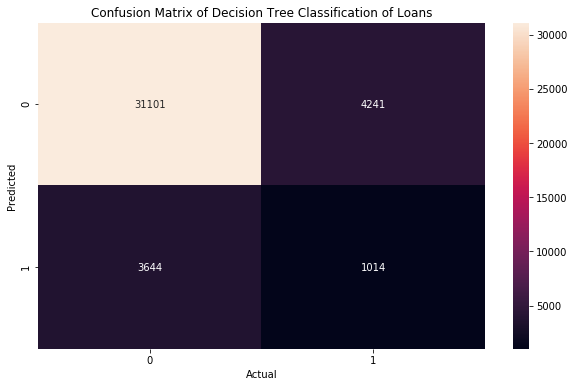

In [83]:
results = loans_clf.predict(x_test)

dt_cm = confusion_matrix(y_test, results)

fig = plt.figure(figsize = (10,6))

ax = sns.heatmap(dt_cm,annot =True, fmt = '.0f')
ax.set(title = 'Confusion Matrix of Decision Tree Classification of Loans', xlabel = 'Actual', ylabel = 'Predicted', xlim = (0,2), ylim = (2,0))
plt.show()

In [84]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

## Performance Measures - 2 marks

### Q18. Accuracy & Precision

Based on the above confusion matrices, calculate, <b>with workings</b>, the <b>Accuracy and Precision</b> for the:

1. Naive Bayes Classifier
2. Decision Tree Classifier

In [89]:
#Formula
# Accuracy = (TP + TN) / (P + N)
# Precision = TP / (TP + FP)

# NAIVE BAYES CLASSIFIER 
# Accuracy = 0.8401621428287565
# Precision = 0.29380053908355797

nb_acc = (nb_cm[1][1] + nb_cm[0][0]) / sum(sum(nb_cm))
nb_pre = nb_cm[1][1] / (nb_cm[1][1] + nb_cm[0][1])

# DECISION TREE
# Accuracy = 0.802875
# Precision = 0.19295908658420552

dt_acc = (dt_cm[1][1] + dt_cm[0][0]) / sum(sum(dt_cm))
dt_pre = dt_cm[1][1]/(dt_cm[1][1] + dt_cm[0][1])
print('Accuracy of Naive Bayes Classifier =', nb_acc)
print('Accuracy of Decision Tree Classifier =', dt_acc)
print('Precision of Naive Bayes Classifier =', nb_pre)
print('Precision of Decision Tree Classifier =', dt_pre)

Accuracy of Naive Bayes Classifier = 0.8401621428287565
Accuracy of Decision Tree Classifier = 0.802875
Precision of Naive Bayes Classifier = 0.29380053908355797
Precision of Decision Tree Classifier = 0.19295908658420552


In [86]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

### Q19. Model Assessment

After assessing the accuracy and precision scores, do you think that the models above are reliable in detecting default loans? Explain your answer.  

In [87]:
# Answer: The models are not entirely reliabe in detecting loans. As seen in the previous question (Q18), the accuracy of
# both the Naive Bayes Classifier and the Decision Tree Classifier are as high as approximately 0.8 (80%). Although accuracy
# is usually the first indicator to determine how good a predictive model is,  a predictive model with high accuracy might be
# of no use in prescriptive analytics if it’s generalisability is of no use. This is where we have to analyse the precision of
# the model. Both models has a low precision of 0.19 and 0.29 for Naive Bayes Classifier and Decision Tree Classifier
# respectively. Thefore, the models have low scores for precision and not considered as good model in detecting default loans.


In [88]:
## TA/INSTRUCTOR ONLY
## MARKS AWARDED: /1

<div class="alert alert-success">
<b>Checkpoint</b>: When you have completed, upload your progress to eLearn. eLearn only accepts the latest notebooks so if you have an existing notebook, your latest upload will <b>override</b> it.
</div>